In [1]:
import pandas as pd
data1 = pd.read_excel('C:/Users/RAJ/Desktop/PYTHOON/Datasets/Linear Regression/Data_Train.xlsx')
print("Train data Dimensions : ",data1.shape)
data2 = pd.read_excel('C:/Users/RAJ/Desktop/PYTHOON/Datasets/Linear Regression/Data_Test.xlsx')
print("Test data Dimensions : ",data2.shape)
data3 = pd.concat([data1,data2],sort = False)
print("Concat data Dimensions : ",data3.shape)
#print(data3.head())

Train data Dimensions :  (11094, 9)
Test data Dimensions :  (2774, 8)
Concat data Dimensions :  (13868, 9)


In [2]:
# To extract unique features of dataset
data3.Average_Cost.unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

In [3]:
# To eliminate ₹ sign
data3["Average_Cost"]=data3["Average_Cost"].str.replace("₹"," ")
data3["Minimum_Order"]=data3["Minimum_Order"].str.replace("₹"," ")
data3["Delivery_Time"]=data3["Delivery_Time"].str.replace("minutes"," ")

In [4]:
# Extracting City from address
data3['City.Pune'] = data3['Location'].apply(lambda x: 'Pune' if 'Pune' in x else None)
data3['City.Kolkata'] = data3['Location'].apply(lambda x: 'Kolkata' if 'Kolkata' in x else None)
data3['City.Mumbai'] = data3['Location'].apply(lambda x: 'Mumbai' if 'Mumbai' in x else None)
data3['City.Bangalore'] = data3['Location'].apply(lambda x: 'Bangalore' if 'Bangalore' in x else None)
data3['City.Delhi'] = data3['Location'].apply(lambda x: 'Delhi' if 'Delhi' in x else None)
data3['City.Hyderabad'] = data3['Location'].apply(lambda x: 'Hyderabad' if 'Hyderabad' in x else None)
data3['City.Noida'] = data3['Location'].apply(lambda x: 'Noida' if 'Noida' in x else None)
data3['City.Gurgaon'] = data3['Location'].apply(lambda x: 'Gurgaon' if 'Gurgaon' in x else None)
data3['City.Majestic'] = data3['Location'].apply(lambda x: 'Bangalore' if 'Majestic' in x else None)
data3['City.Marathalli'] = data3['Location'].apply(lambda x: 'Bangalore' if 'Marathalli' in x else None)
data3['City.Electronic'] = data3['Location'].apply(lambda x: 'Bangalore' if 'Electronic' in x else None)
data3['City.Gurgoan'] = data3['Location'].apply(lambda x: 'Gurgaon' if 'Gurgoan' in x else None)
data3['City.Whitefield'] = data3['Location'].apply(lambda x: 'Bangalore' if 'Whitefield' in x else None)

data3['City'] = data3['City.Pune'].map(str)+data3['City.Kolkata'].map(str)+data3['City.Mumbai'].map(str)+data3['City.Bangalore'].map(str)+data3['City.Delhi'].map(str)+data3['City.Hyderabad'].map(str)+data3['City.Noida'].map(str)+data3['City.Gurgaon'].map(str)+data3['City.Majestic'].map(str)+data3['City.Marathalli'].map(str)+data3['City.Electronic'].map(str)+data3['City.Gurgoan'].map(str)+data3['City.Whitefield'].map(str)

data3['City'] = data3['City'].apply(lambda x: x.replace('None',''))


In [5]:
data3.head()

Restaurant                             Location  \
0    ID_6321  FTI College, Law College Road, Pune   
1    ID_2882                 Sector 3, Marathalli   
2    ID_1595                       Mumbai Central   
3    ID_5929                      Sector 1, Noida   
4    ID_6123   Rmz Centennial, I Gate, Whitefield   

                                 Cuisines Average_Cost Minimum_Order Rating  \
0  Fast Food, Rolls, Burger, Salad, Wraps          200            50    3.5   
1                     Ice Cream, Desserts          100            50    3.5   
2         Italian, Street Food, Fast Food          150            50    3.6   
3          Mughlai, North Indian, Chinese          250            99    3.7   
4                         Cafe, Beverages          200            99    3.2   

  Votes Reviews Delivery_Time City.Pune  ... City.Delhi City.Hyderabad  \
0    12       4          30        Pune  ...       None           None   
1    11       4          30        None  ...       None           None   
2    99      30          65        None  ...       None           None   
3   176      95          30        None  ...       None           None   
4   521     235          65        None  ...       None           None   

  City.Noida City.Gurgaon City.Majestic City.Marathalli City.Electronic  \
0       None         None          None            None            None   
1       None         None          None       Bangalore            None   
2       None         None          None            None            None   
3      Noida         None          None            None            None   
4       None         None          None            None            None   

  City.Gurgoan City.Whitefield       City  
0         None            None       Pune  
1         None            None  Bangalore  
2         None            None     Mumbai  
3         None            None      Noida  
4         None       Bangalore  Bangalore  

[5 rows x 23 columns]

In [6]:
data5 = data3[['Restaurant','City','Cuisines','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Delivery_Time']]

In [7]:
data5

Restaurant       City                                        Cuisines  \
0       ID_6321       Pune          Fast Food, Rolls, Burger, Salad, Wraps   
1       ID_2882  Bangalore                             Ice Cream, Desserts   
2       ID_1595     Mumbai                 Italian, Street Food, Fast Food   
3       ID_5929      Noida                  Mughlai, North Indian, Chinese   
4       ID_6123  Bangalore                                 Cafe, Beverages   
...         ...        ...                                             ...   
2769    ID_6342      Delhi                              Fast Food, Chinese   
2770    ID_8495  Bangalore  Continental, North Indian, Desserts, Beverages   
2771    ID_7122  Hyderabad                            Andhra, South Indian   
2772    ID_2475      Noida                                          Bakery   
2773    ID_1595     Mumbai                 Italian, Street Food, Fast Food   

     Average_Cost Minimum_Order Rating Votes Reviews Delivery_Time  
0             200            50    3.5    12       4          30    
1             100            50    3.5    11       4          30    
2             150            50    3.6    99      30          65    
3             250            99    3.7   176      95          30    
4             200            99    3.2   521     235          65    
...           ...           ...    ...   ...     ...           ...  
2769          100            50    NEW     -       -           NaN  
2770          250            50    3.1     5       1           NaN  
2771          150            50    3.0    16       1           NaN  
2772          100            99    3.0     7       2           NaN  
2773          150            50    3.6    99      30           NaN  

[13868 rows x 9 columns]

In [8]:
data5.to_csv('Citywisedata.csv')

In [9]:
# Function to count number of cusines in particular resturant
def countoc(s):
    a = s.split(',')
    return len(a)

In [10]:
countoc('Fast Food,Rolls,Burger,Salad,Wraps')

5

In [11]:
cols = ['Average_Cost','Minimum_Order','Rating','Votes','Reviews','Delivery_Time']


In [13]:
import warnings  
warnings.filterwarnings('ignore')
data5[cols] = data5[cols].apply(pd.to_numeric,errors='coerce')

In [14]:
import warnings  
warnings.filterwarnings('ignore')
data5['Average_Cost'] = data5['Average_Cost'].fillna(data5['Average_Cost'].median())
data5['Rating'] = data5['Rating'].fillna(data5['Rating'].median())
data5['Votes'] = data5['Votes'].fillna(data5['Votes'].median())
data5['Reviews'] = data5['Reviews'].fillna(data5['Reviews'].median())
data5.isna().sum()

Restaurant          0
City                0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
dtype: int64

In [15]:
# Getting Test data before joining from cleaned data
train = data5[0:11094]
test = data5[11094:]

In [16]:
test.head()

Restaurant       City                                           Cuisines  \
0    ID_2842  Bangalore                    North Indian, Chinese, Assamese   
1     ID_730  Bangalore                                     Biryani, Kebab   
2    ID_4620      Noida                                          Fast Food   
3    ID_5470      Delhi  Mithai, North Indian, Chinese, Fast Food, Sout...   
4    ID_3249      Noida                                 Chinese, Fast Food   

   Average_Cost  Minimum_Order  Rating  Votes  Reviews  Delivery_Time  
0         350.0             50     4.2  361.0    225.0            NaN  
1         100.0             50     3.6   63.0     26.0            NaN  
2         100.0             50     3.6   36.0     16.0            NaN  
3         200.0             50     3.6   66.0     33.0            NaN  
4         150.0             50     2.9   38.0     14.0            NaN

In [17]:
# Generating dummy variables for One Hot Encoder
x = train[['Restaurant','City','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Cuisines']]
y = train['Delivery_Time']
x = pd.get_dummies(data=x,drop_first=True)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

# EDA

## Bar Graph (City Vs Number of Restaurants)

Text(0.5, 1.0, 'City Vs Number of Restaurants')

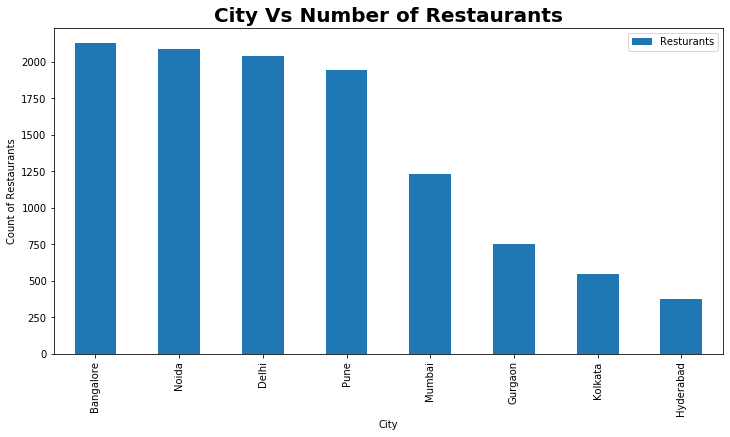

In [24]:
from matplotlib import pyplot as plt
plt.figure(figsize = (12,6))
ax = train.City.value_counts().plot(kind = 'bar')
ax.legend(['Resturants'])
plt.xlabel("City")
plt.ylabel("Count of Restaurants")
plt.title("City Vs Number of Restaurants",fontsize=20,weight='bold')

## Pie Chart (Percentage of Restaurants Present in that City )

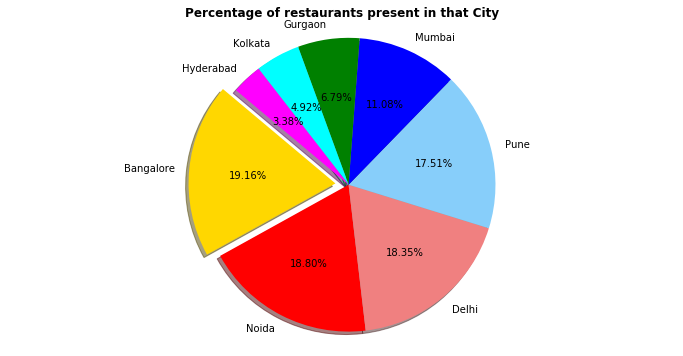

In [28]:
# Location wise distribution of Restaurant Records
plt.figure(figsize = (12,6))
names  = train['City'].value_counts()[:10].index
values  = train['City'].value_counts()[:10].values
colors = ['gold','red','lightcoral','lightskyblue','blue','green','cyan','magenta']
explode = [0.09,0,0,0,0,0,0,0]

plt.pie(values, explode=explode , labels = names , colors=colors ,startangle=140,shadow=True,autopct='%1.2f%%')
plt.axis('equal')
plt.title('Percentage of restaurants present in that City', weight='bold')
plt.show()

## Bar Graph (Number of Restaurants vs Delivery Time)

Text(0.5, 0, 'Delivery_Time')

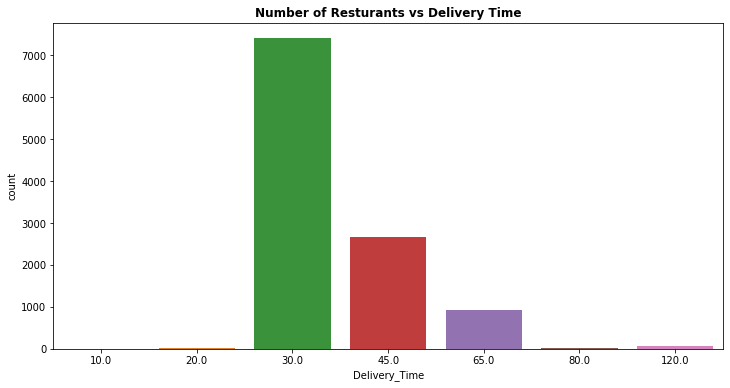

In [27]:
import seaborn as sns
plt.figure(figsize=(12,6))
ax1=sns.countplot(train['Delivery_Time'])
plt.title('Number of Resturants vs Delivery Time', weight='bold')
plt.xlabel('Delivery_Time') 

## Rating Vs Time Distribution

Text(0.5, 1.0, 'Rating vs Delivery Time distribution')

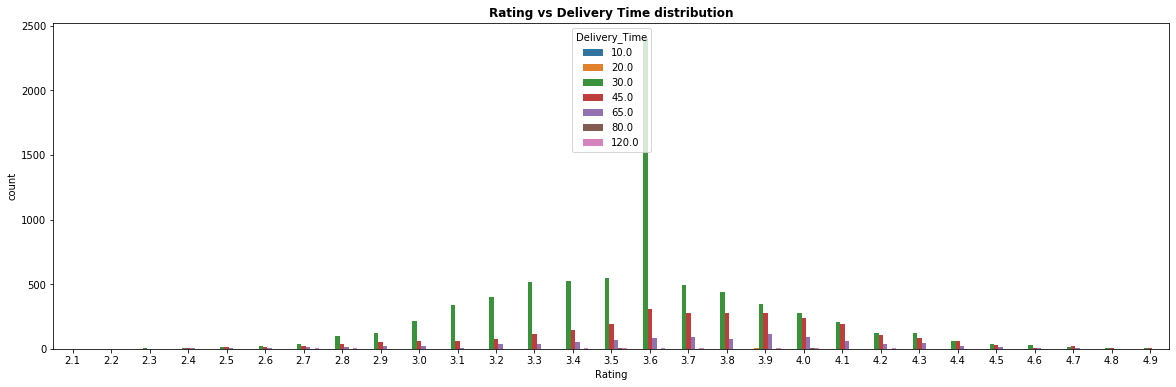

In [30]:
plt.figure(figsize=(20,6))
ax2 = sns.countplot(x='Rating',hue='Delivery_Time',data=train)
plt.title('Rating vs Delivery Time distribution',weight='bold')

## City Vs Delivery Time Distribution

Text(0.5, 1.0, 'City vs Delivery Time distribution')

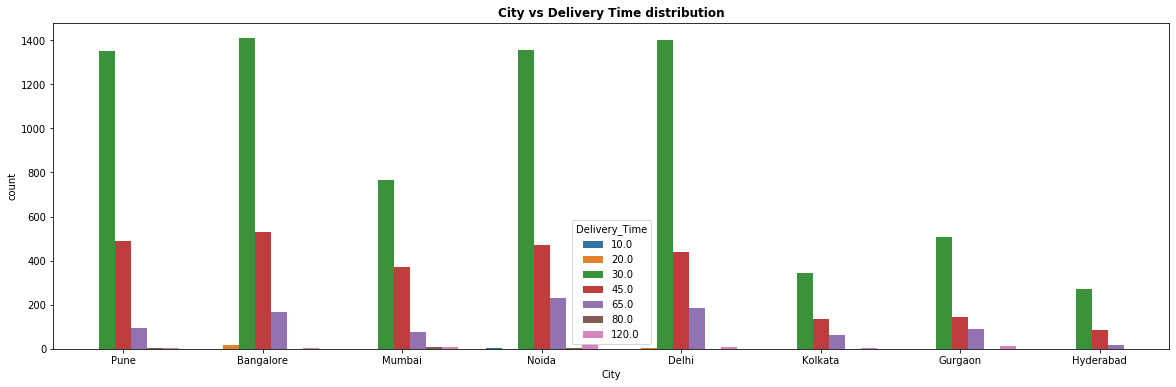

In [32]:
plt.figure(figsize=(20,6))
ax2 = sns.countplot(x='City',hue='Delivery_Time',data=train)
plt.title('City vs Delivery Time distribution',weight='bold')

In [33]:
# Splitting the data in training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25 ,random_state=0 ) 

# Decision Tree Classifier

In [38]:
# Fitting Decision Tree to the training dataset
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy' , random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         2
        20.0       0.50      0.20      0.29         5
        30.0       0.85      0.89      0.87      1843
        45.0       0.64      0.58      0.61       684
        65.0       0.49      0.45      0.47       220
        80.0       1.00      0.67      0.80         3
       120.0       0.60      0.35      0.44        17

    accuracy                           0.77      2774
   macro avg       0.58      0.45      0.50      2774
weighted avg       0.76      0.77      0.77      2774



In [41]:
train_score=classifier.score(x_train,y_train)
test_score = classifier.score(x_test,y_test)
print("Train_Score = ",train_score)
print("Test_Score = ",test_score)

Train_Score =  0.9998798076923077
Test_Score =  0.7728911319394376


In [42]:
# Cross-Validation

import warnings  
warnings.filterwarnings('ignore')

# Applying k-folds cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier,x,y,cv=5)
print("Mean = ",accuracies.mean())
print("Standard Deviation = ",accuracies.std())

Mean =  0.7809639338476647
Standard Deviation =  0.007596211286239324


In [53]:
print("Y_Test",y_test.head(10))

Y_Test 9131     30.0
1035     45.0
6291     45.0
7425     30.0
5783     30.0
4474     30.0
10236    30.0
1830     45.0
1640     45.0
10228    45.0
Name: Delivery_Time, dtype: float64


In [56]:
print("Y_Pred",y_pred[1:11])

Y_Pred [45. 45. 30. 30. 30. 30. 30. 65. 45. 30.]


In [44]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.490546 to fit



# Random Forest Classifier

In [57]:
# Fitting Random Forest to Training dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10 , criterion='entropy' , random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [58]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         2
        20.0       1.00      0.20      0.33         5
        30.0       0.81      0.93      0.87      1843
        45.0       0.66      0.54      0.59       684
        65.0       0.90      0.33      0.48       220
        80.0       1.00      0.33      0.50         3
       120.0       1.00      0.18      0.30        17

    accuracy                           0.78      2774
   macro avg       0.77      0.36      0.44      2774
weighted avg       0.78      0.78      0.76      2774



In [60]:
train_score=classifier.score(x_train,y_train)
test_score = classifier.score(x_test,y_test)
print("Train_Score = ",train_score)
print("Test_Score = ",test_score)

Train_Score =  0.9830528846153846
Test_Score =  0.7819033886085076


In [61]:
# Cross-Validation

import warnings  
warnings.filterwarnings('ignore')

# Applying k-folds cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier,x,y,cv=5)
print("Mean = ",accuracies.mean())
print("Standard Deviation = ",accuracies.std())

Mean =  0.7995289540111508
Standard Deviation =  0.0043677190232997674


In [63]:
print("Y_Test",y_test.head(10))

Y_Test 9131     30.0
1035     45.0
6291     45.0
7425     30.0
5783     30.0
4474     30.0
10236    30.0
1830     45.0
1640     45.0
10228    45.0
Name: Delivery_Time, dtype: float64


In [64]:
print("Y_Pred",y_pred[1:11])

Y_Pred [45. 30. 30. 30. 30. 30. 30. 30. 45. 30.]


# Support Vector Machine Classifier

In [65]:
# Fitting SVM to the dataset
from sklearn import svm
classifier = svm.SVC (kernel ='rbf')
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [67]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         2
        20.0       0.00      0.00      0.00         5
        30.0       0.73      0.99      0.84      1843
        45.0       0.88      0.28      0.42       684
        65.0       0.85      0.18      0.29       220
        80.0       0.00      0.00      0.00         3
       120.0       1.00      0.18      0.30        17

    accuracy                           0.74      2774
   macro avg       0.49      0.23      0.26      2774
weighted avg       0.77      0.74      0.69      2774



In [68]:
train_score=classifier.score(x_train,y_train)
test_score = classifier.score(x_test,y_test)
print("Train_Score = ",train_score)
print("Test_Score = ",test_score)

Train_Score =  0.9515625
Test_Score =  0.7400865176640231


In [ ]:
print("Y_Test",y_test.head(10))

In [ ]:
print("Y_Pred",y_pred[1:11])